In [2]:
#variant 2
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
#df - degrees of freedom
#scale - среднеквадратичное отклонение


-----------------
P =  0.1
-----------------
Длина выборки:  4
M:  11.43  S:  1.4401233743444781
Нормальный закон
M_max:  12.614396077774053  M_min:  10.245603922225946
Распр. Стьюдента
M_max:  13.12456684539286  M_min:  9.73543315460714
Хи квадрат
S_max:  4.205172557678906  S_min:  0.8922845972000037
-----------------
Длина выборки:  6
M:  8.736  S:  3.2519218932809553
Нормальный закон
M_max:  10.919693782137855  M_min:  6.552306217862146
Распр. Стьюдента
M_max:  11.411161200641072  M_min:  6.06083879935893
Хи квадрат
S_max:  6.794102084505867  S_min:  2.185453322588908
-----------------
Длина выборки:  10
M:  10.443273000000001  S:  3.9474304892199563
Нормальный закон
M_max:  12.496522605218583  M_min:  8.39002339478142
Распр. Стьюдента
M_max:  12.731524272709263  M_min:  8.15502172729074
Хи квадрат
S_max:  6.494303065954467  S_min:  2.879046558623791
-----------------
Длина выборки:  12
M:  11.820605  S:  3.5556441211160656
Нормальный закон
M_max:  13.508925603301318  M_min:  10.132

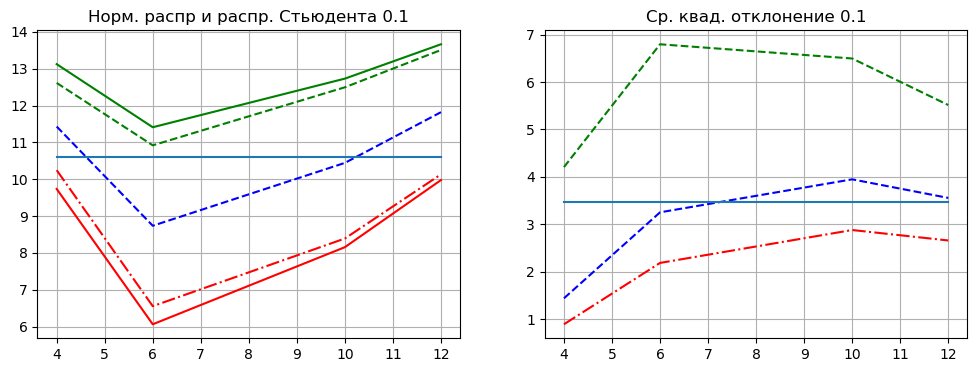

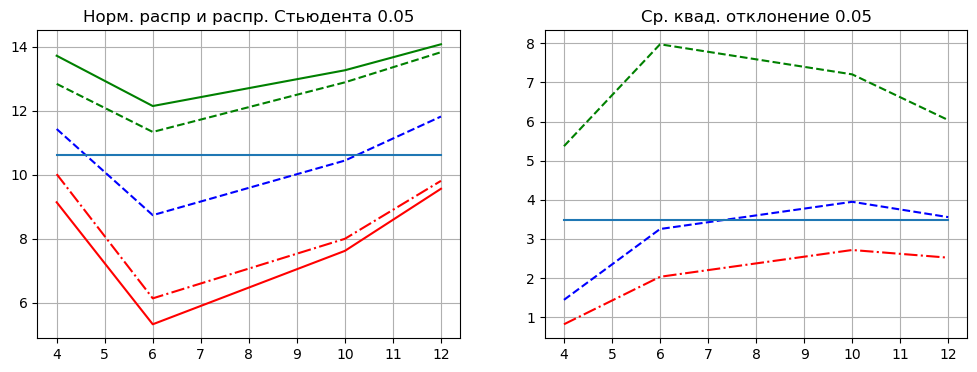

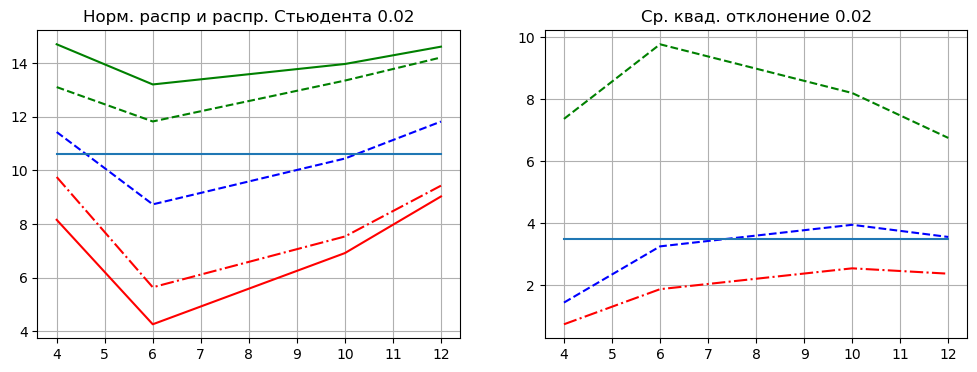

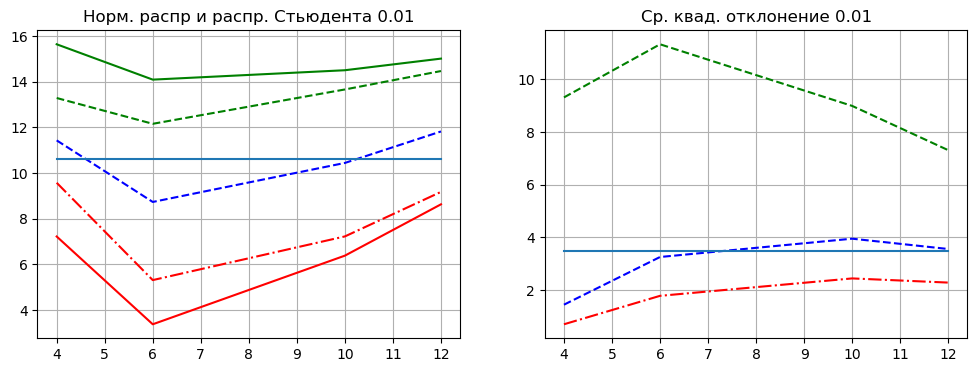

In [6]:
N = [
    [9.577, 12.628, 11.003, 12.512],
    [12.718, 6.167, 9.919, 12.095, 5.811, 5.706],
    [12.01632, 9.25925, 17.34572, 5.90936, 13.68768, 6.50783, 13.619, 5.94819, 12.47586, 7.66352],
    [11.89611, 12.35433, 5.35926, 13.89123, 10.1707, 9.25583, 16.56128, 10.49801, 9.71622, 14.09442, 9.55832, 18.49155]
]

P = [0.1, 0.05, 0.02, 0.01]


for p in P:

    #normal
    m_i = []
    m_min = []
    m_max = []

    #Student
    M_i = []
    M_min = []
    M_max = []

    #chi2
    s_i = []
    s_min = []
    s_max = []

    x = []

    print("-----------------")
    print("P = ", p)

    for n in N:
        print("-----------------")
        x.append(len(n))
        print("Длина выборки: ", len(n))

        m = sum(n) / len(n)
        d = ((sum([x ** 2 for x in n]) / len(n)) - m ** 2) * ((len(n)) / (len(n) - 1))
        s = d ** 0.5

        m_i.append(m)
        M_i.append(m)

        print("M: ", m, " S: ", s)

        t_quantile = t.ppf(1-p/2, df = len(n)-1)
        norm_quantile = norm.ppf(1-p / 2, loc=0, scale=1)

        t_low = m - t_quantile * (s / (len(n)**0.5))
        t_high = m + t_quantile * (s / (len(n)**0.5))

        norm_low = m - norm_quantile * (s / (len(n)**0.5))
        norm_high = m + norm_quantile * (s / (len(n)**0.5))

        #normal
        m_min.append(norm_low)
        m_max.append(norm_high)

        #student
        M_min.append(t_low)
        M_max.append(t_high)

        chi2_low = chi2.ppf(1-(p/2), len(n) - 1)
        chi2_high = chi2.ppf((p/2), len(n) - 1)

        s_min_2 = (s ** 2 * (len(n)-1)) / chi2_low
        s_max_2 = (s ** 2 * (len(n)-1)) / chi2_high
        s_a_min = s_min_2 ** 0.5
        s_a_max = s_max_2 ** 0.5

        s_i.append(s)
        s_min.append(s_a_min)
        s_max.append(s_a_max)

        
        print("Нормальный закон")
        print("M_max: ", norm_high, " M_min: ", norm_low)
        print("Распр. Стьюдента")
        print("M_max: ", t_high, " M_min: ", t_low)
        print("Хи квадрат")
        print("S_max: ", s_a_max, " S_min: ", s_a_min)

    print()
    print("-----------------")
    print("MS")
    ms = (sum(m_i) / len(m_i))
    print(ms)
    print("Sср")
    s_sum = 0
    s_s_sum = 0
    for i in range(len(s_i)):
        s_sum += s_i[i] ** 2 * (len(N[i]) - 1)
        s_s_sum += len(N[i])
    s_s_sum -= len(N)
    s_cp = (s_sum / s_s_sum) ** 0.5
    print(s_cp)
    print("-----------------")

    y = [ms] * 4

    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.set_title("Норм. распр и распр. Стьюдента " + str(p))
    ax1.plot(x, m_min, color="red", linestyle='dashdot')
    ax1.plot(x, m_max, color="green", ls="--")

    ax1.plot(x, M_min, color="red",)
    ax1.plot(x, M_max, color="green")

    ax1.plot(x, m_i, color="blue", ls="--")
    ax1.plot(x, y)
    ax1.grid(True)

    # ax2.set_title("Распределение Стьюдента " + str(p))
    # ax2.plot(x, M_min, color="red", linestyle='dashdot')
    # ax2.plot(x, M_max, color="green", ls="--")
    # ax2.plot(x, M_i, color="blue", ls="--")
    # ax2.plot(x, y)
    # ax2.grid(True)

    y = [s_cp] * 4

    ax3.set_title("Ср. квад. отклонение " + str(p))
    ax3.plot(x, s_min, color="red", linestyle='dashdot')
    ax3.plot(x, s_max, color="green", ls="--")
    ax3.plot(x, s_i, color="blue", ls="--")
    ax3.plot(x, y)
    ax3.grid(True)



    

    

    


In [ ]:
#Sср = sqrt(((n1 - 1)S1^2 + (n2-1)S2^2...)/n1+n2+n3...-len(n))